In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("customer_shopping_behavior.csv")

In [2]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3863.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750065,25.351538
std,1125.977353,15.207589,23.685392,0.716983,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.800000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Data Cleaning

In [5]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [6]:
df['Review Rating']=df.groupby('Category')['Review Rating'].transform(lambda x:x.fillna(x.median()))

In [7]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")

In [9]:
df=df.rename(columns={'purchase_amount_(usd)':"purchase_amount"})

In [10]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

## Creating a column of age_group

In [11]:
labels=['Young Adult','Adult','Middle-aged','Senior']

In [12]:
df['age_group']=pd.qcut(df['age'],q=4,labels=labels)

In [13]:
df[['age','age_group']].head()

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged


# Creating column Purchase frequency days

In [14]:
df.frequency_of_purchases.unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [15]:
purchase_days={
    'Fortnightly':14,
    'Weekly':7,
    'Annually':365,
    "Quarterly":90,
    'Bi-Weekly':14,
    "Monthly":30,
    'Every 3 Months':90
}
df['purchase_frequency_days']=df['frequency_of_purchases'].map(purchase_days)

In [16]:
def segment(x):
    if x == 1:
        return "New"
    elif x>1 and x<=5:
        return "Returning"
    elif x>5:
        return "Loyal"
df['customer_segement']=df['previous_purchases'].transform(lambda x:segment(x))

In [17]:
df.head(5)

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,...,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days,customer_segement
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle-aged,14,Loyal
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adult,14,Returning
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle-aged,7,Loyal
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult,7,Loyal
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle-aged,365,Loyal


In [18]:
df.drop("promo_code_used",axis=1,inplace=True)
df.drop("frequency_of_purchases",axis=1,inplace=True)

# Performing EDA

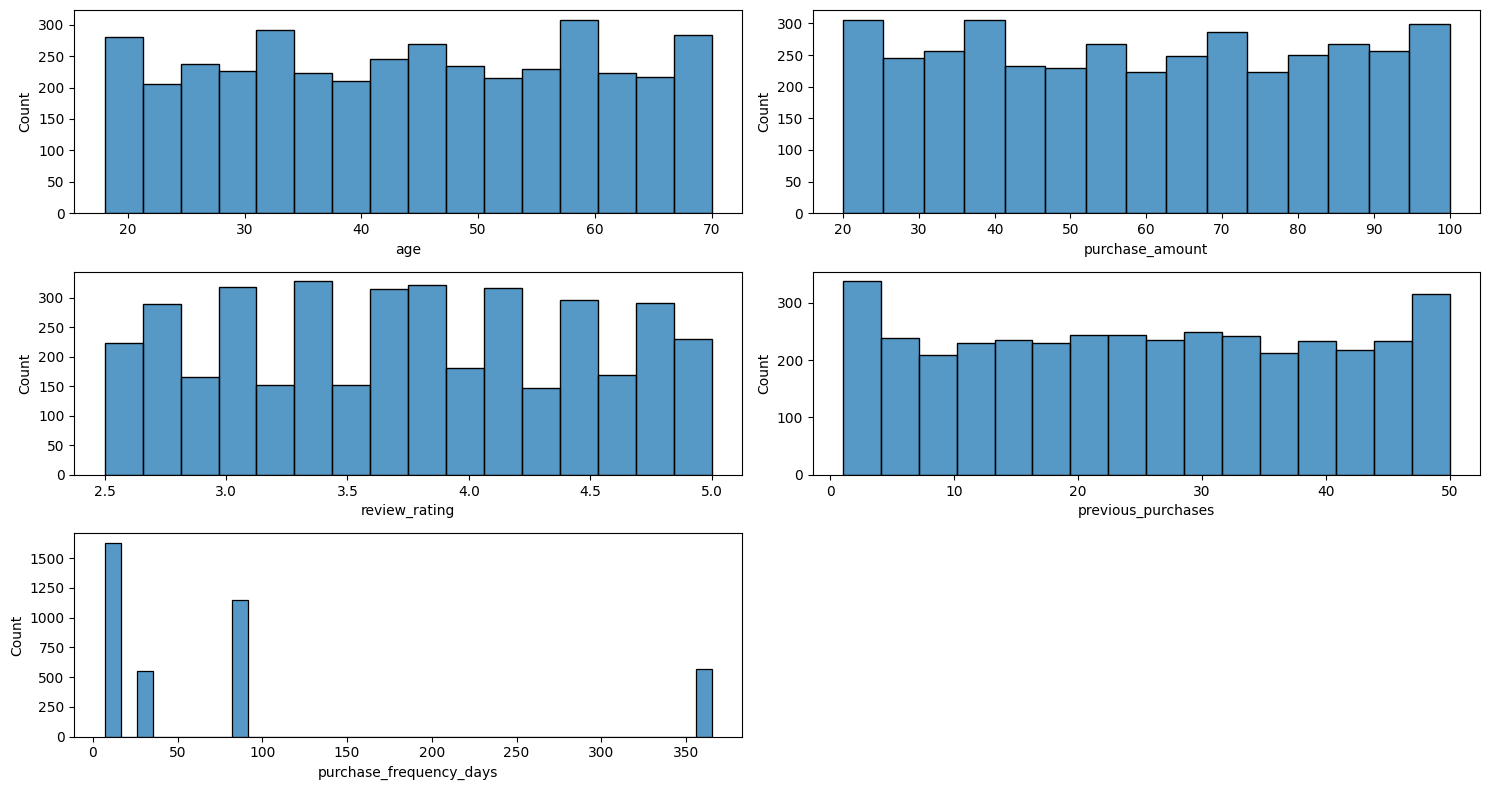

In [64]:
numeric_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,8))
plt.subplot(3,2,1)
plt_index=1
for i ,col in enumerate(numeric_cols):
    if col == 'customer_id':
        continue
    plt.subplot(3,2,plt_index)
    sns.histplot(x=df[col])
    plt_index+=1
plt.tight_layout()
plt.show()

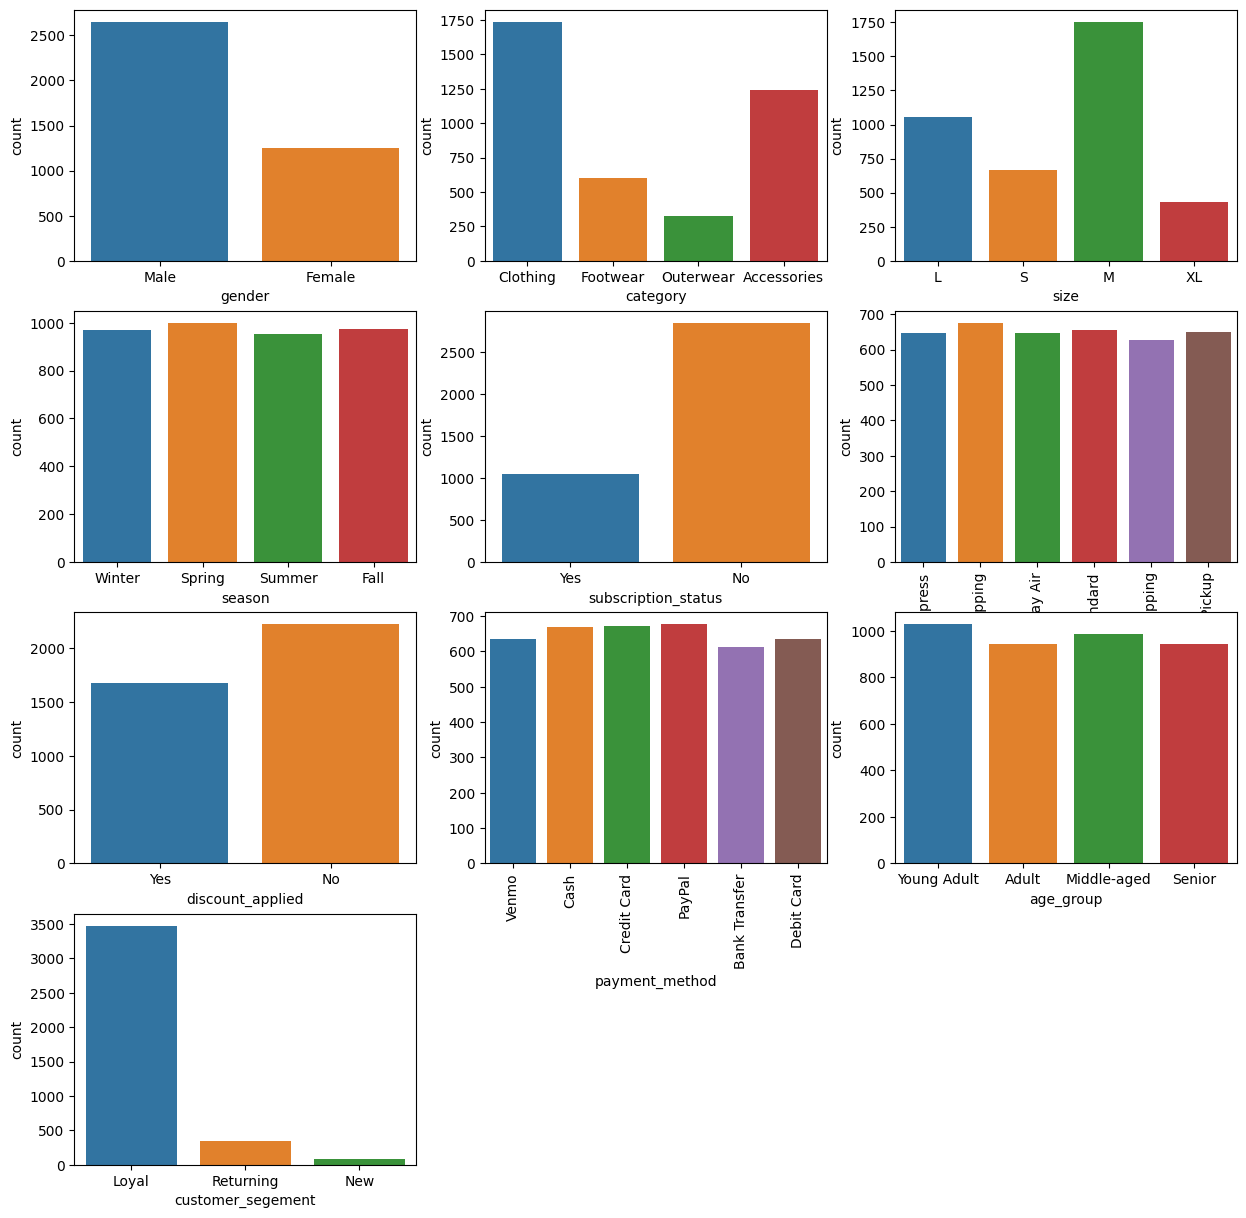

In [63]:
categorical_cols=df.select_dtypes(include=['object','category']).columns
categorical_cols
plt.figure(figsize=(15,15))
plt_catindex=1
for i, cat in enumerate(categorical_cols):
    if cat in ('item_purchased','location','color'):
        continue
    plt.subplot(4,3,plt_catindex)
    sns.countplot(data=df,x=cat)
    plt_catindex+=1
    if cat in ("shipping_type",'payment_method'):
        plt.xticks(rotation=90)
plt.tight_layout
plt.show()

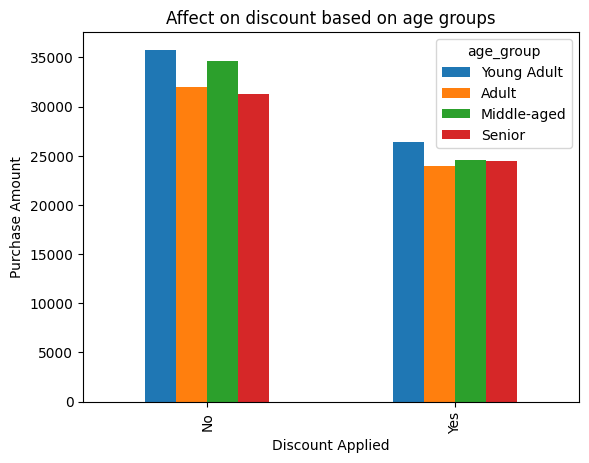

In [23]:
df.groupby(['discount_applied','age_group'])['purchase_amount'].sum().unstack().plot(kind='bar')
plt.title("Affect on discount based on age groups")
plt.xlabel("Discount Applied")
plt.ylabel("Purchase Amount")
plt.show()

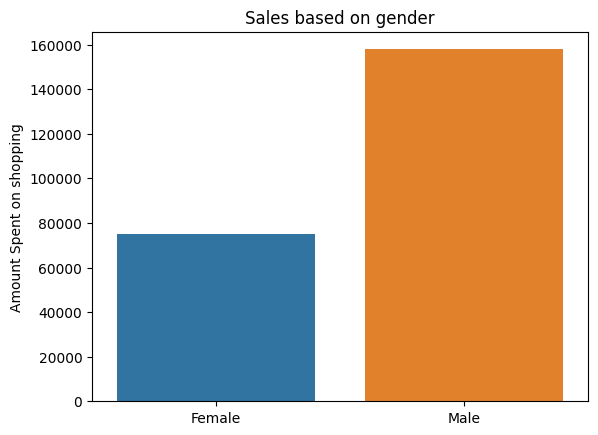

In [25]:
data=df.groupby('gender')['purchase_amount'].sum().reset_index()
sns.barplot(x="gender",y="purchase_amount",data=data)
plt.title("Sales based on gender")
plt.xlabel("")
plt.ylabel("Amount Spent on shopping")
plt.show()

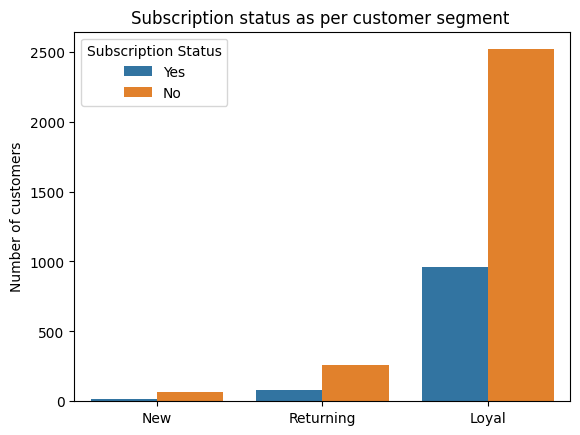

In [42]:
customer=df.groupby(['customer_segement','subscription_status'])['subscription_status'].count().sort_values().reset_index(name="count")
sns.barplot(data=customer,x='customer_segement',y='count',hue='subscription_status')
plt.title("Subscription status as per customer segment ")
plt.xlabel("")
plt.ylabel("Number of customers")
plt.legend(title='Subscription Status')
plt.tight_layout
plt.show()

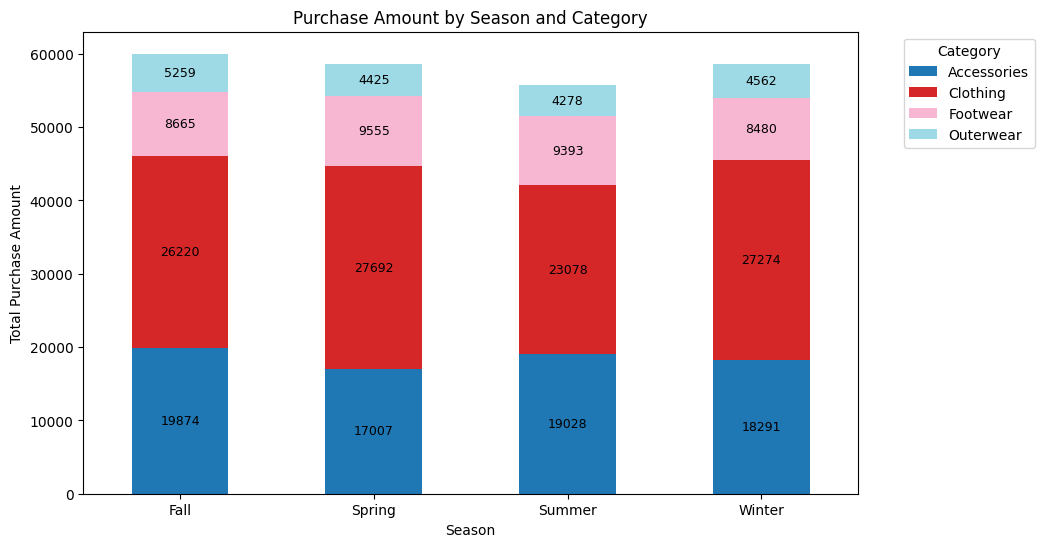

In [65]:
df2 = df.groupby(['season','category'])['purchase_amount'].sum().unstack()

ax = df2.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

# Add values on each segment
for i, season in enumerate(df2.index):
    bottom = 0
    for cat in df2.columns:
        value = df2.loc[season, cat]
        ax.text(i, bottom + value/2, f"{int(value)}", ha='center', va='center', fontsize=9)
        bottom += value

plt.title("Purchase Amount by Season and Category")
plt.ylabel("Total Purchase Amount")
plt.xlabel("Season")
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Connecting to postgres sql

In [ ]:
pip install psycopg2-binary sqlalchemy

In [ ]:
from sqlalchemy import create_engine
username='postgres'
password='1234'
host='localhost'
port='5432'
database='customer_behaviour'

engine=create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")
table_name='customer'
df.to_sql(table_name,engine,if_exists='replace',index=False)

print(f"Data sucessfully loaded into table {table_name} in database {database}.")
